# Assignment 1
## Basic Hebbian Learning

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
#1) Load dataset
u = np.loadtxt("../lab2_1_data.csv", delimiter=",", unpack=True)

In [8]:
#2) Implement a linear firing rate model
def linear_model(u,w):
    return np.dot(u,w)

Epoch 0 of 1000
Epoch 100 of 1000
Epoch 200 of 1000
Epoch 300 of 1000
Epoch 400 of 1000
Epoch 500 of 1000
Epoch 600 of 1000
Epoch 700 of 1000
Epoch 800 of 1000
Epoch 900 of 1000


/tmp/ipykernel_6876/2577736095.py:42: RuntimeWarning: overflow encountered in square
  w_norm = np.sqrt(w1**2+w2**2)
/tmp/ipykernel_6876/2577736095.py:42: RuntimeWarning: overflow encountered in add
  w_norm = np.sqrt(w1**2+w2**2)


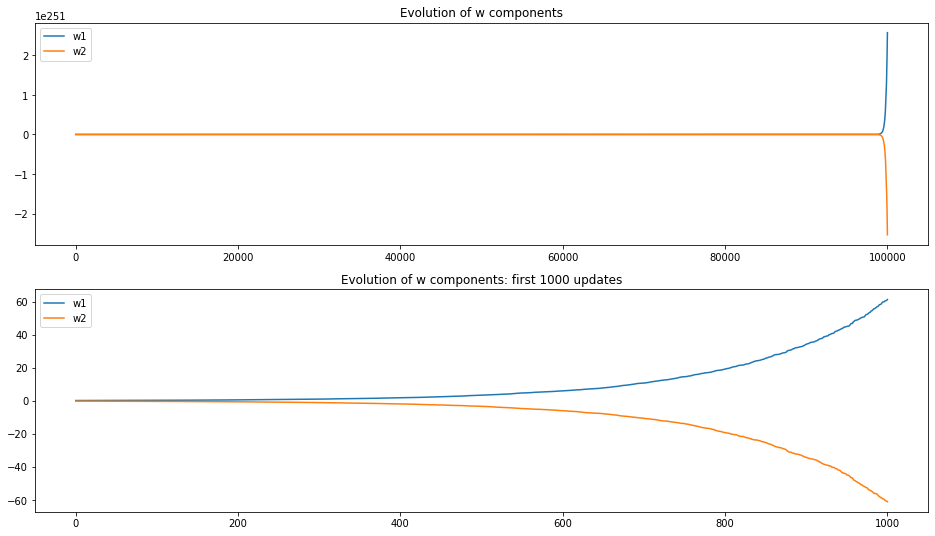

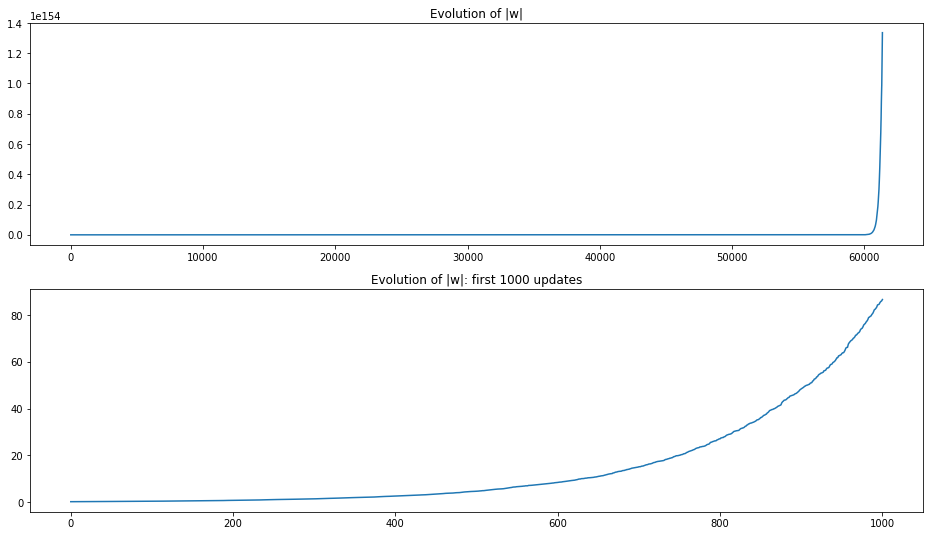

In [9]:
#3) Implement Basic Hebb Rule
name = 'Basic_Hebbian_Rule'
#randomly initialized wheight vector, from a uniform distribution [-1,1]
w = np.random.rand(2)*2 - 1 

#parameters
eta = 0.01
threshold = 1e-3
epochs = 1000

#to keep track of evolution of w during training
w_hist = w
wold = w

for N in range (epochs):


    if N % (epochs/10) == 0:
        print(f"Epoch {N} of {epochs}")

    #shuffle the input dataset
    uu = np.random.permutation(u)  

    for i in range (len(uu)):
        #Compute output
        v = linear_model(uu[i], w)
        #Hebbian rule
        w = w + eta*v*uu[i]

        w_hist = np.vstack((w_hist, w))
    
    #stop learning if w stabilizes
    if np.linalg.norm(w-wold) < threshold:
        print(f"Stopped at epoch {N}")
        break
    wold = w


#plot P2
w1 = (np.transpose(w_hist))[0]
w2 = (np.transpose(w_hist))[1]
w_norm = np.sqrt(w1**2+w2**2)
t=np.arange(0,len(w1))

plt.figure(figsize=(16, 9))
plt.subplot(2,1,1)
plt.title('Evolution of w components')
plt.plot(t,w1, label='w1')
plt.plot(t,w2, label='w2')
plt.xlabel='#updates'
plt.ylabel='w components'
plt.legend()

plt.subplot(2,1,2)
xmax = int(len(w1)/100)
plt.title(f'Evolution of w components: first {xmax} updates')
mask = (t <= xmax)
plt.plot(t[mask], w1[mask], label='w1')
plt.plot(t[mask], w2[mask], label='w2')
plt.xlabel='#updates'
plt.ylabel='w components'
plt.legend()
plt.savefig(name + '_w_evolution',format='pdf')



plt.figure(figsize=(16, 9))
plt.subplot(2,1,1)
plt.title('Evolution of |w|')
plt.plot(t,w_norm)
plt.xlabel='#updates'
plt.ylabel='|w|'

plt.subplot(2,1,2)
xmax = int(len(w1)/100)
plt.title(f'Evolution of |w|: first {xmax} updates')
mask = (t <= xmax)
plt.plot(t[mask], w_norm[mask])
plt.xlabel='#updates'
plt.ylabel='|w|'
plt.savefig(name + '_|w|_evolution',format='pdf')



plt.show()

[[ 0.32640973 -0.25904598]
 [-0.25904598  0.321666  ]]


 max eigvect [ 0.71033647 -0.70386228]
0.7103364653931533


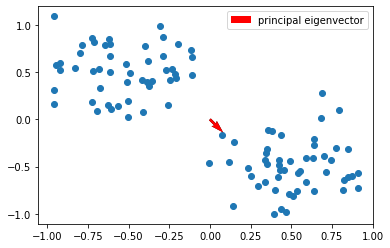

In [10]:
#P1
u1 = (np.transpose(u))[0]
u2 = (np.transpose(u))[1]
plt.scatter(u1,u2)
plt.quiver(*w)


Q = np.array([[0,0], [0,0]])
for i in range (len(u)):
     Q = Q + np.outer(u[i],u[i])

Q = Q/len(u)

print(Q)
eig_val, eig_vec = np.linalg.eig(Q)
#print(eig_val)
n = np.argmax(eig_val)
max_eigvect = eig_vec[:,n]
print('\n\n max eigvect',max_eigvect)

print(max_eigvect[0])
plt.quiver(max_eigvect[0], max_eigvect[1], color='red', label = 'principal eigenvector')
plt.legend()
plt.show()

